In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import yfinance as yf
import seaborn as sns
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
pd.options.mode.chained_assignment = None
tf.random.set_seed(0)

## Recurrant Neural Networks

### Past Model

[*********************100%***********************]  1 of 1 completed
[[0.00985416 0.00966889 0.0132021  ... 0.01390689 0.01579767 0.01467998]
 [0.009923   0.00973592 0.01326107 ... 0.01400217 0.01588702 0.01476151]
 [0.01010145 0.0099034  0.01338687 ... 0.01417951 0.01607105 0.01493761]
 ...
 [0.7867758  0.76020545 0.7436688  ... 0.68036586 0.7043781  0.68974316]
 [0.77524173 0.74937505 0.7349373  ... 0.6725957  0.6952103  0.681754  ]
 [0.7488381  0.7256608  0.7132133  ... 0.6558376  0.6770088  0.6658664 ]]
(668, 30)
757


<AxesSubplot:title={'center':'TSLA'}, xlabel='Date'>

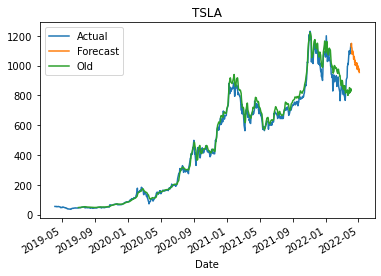

In [27]:
ticker = "TSLA"

# download the data
df = yf.download(tickers=[ticker], period='3y')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)
#print(y)
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)
#print(y)

# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])

X = np.array(X)
Y = np.array(Y)
#print(X.shape, Y.shape)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)
tmp = model.predict(X)
print(tmp)
print(tmp.shape)
old_preds = []
for i in range(len(tmp)):
    old_preds.append(tmp[i][0])
for i in range(len(tmp[-1])):
    old_preds.append(tmp[-1][i])
#old_preds = np.array(old_preds)
#print(old_preds.shape)
# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
print(len(df_past))
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]
df_past['Old'] = np.nan
for i in range(len(old_preds)):
    df_past["Old"].iloc[i+n_lookback-1] = scaler.inverse_transform(np.array(old_preds[i]).reshape(1,-1))

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title=ticker)

### Model With Forward Predictions

[*********************100%***********************]  1 of 1 completed
[array([[0.19144717],
       [0.19230245],
       [0.16131735],
       [0.18056863],
       [0.17039537],
       [0.20784748],
       [0.29838695],
       [0.25323724],
       [0.26317046],
       [0.26456599],
       [0.22682869],
       [0.23337079],
       [0.27107806],
       [0.23442115],
       [0.24899092],
       [0.26219519],
       [0.21198884],
       [0.19647385],
       [0.17036533],
       [0.21904116],
       [0.18221922],
       [0.16526364],
       [0.16127238],
       [0.15016874],
       [0.16341807],
       [0.09840191],
       [0.08063619],
       [0.03965788],
       [0.01234898],
       [0.03943277],
       [0.02006151],
       [0.02162199],
       [0.        ],
       [0.03499138],
       [0.02613847],
       [0.06449093],
       [0.06186508],
       [0.08353212],
       [0.10111779],
       [0.09267004],
       [0.09068948],
       [0.06251027],
       [0.01407458],
       [0.0534023 ],
      

<AxesSubplot:title={'center':'TSLA'}, xlabel='Date'>

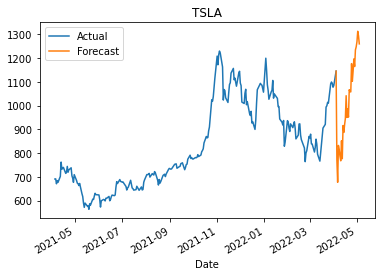

In [8]:
ticker = "TSLA"

# download the data
df = yf.download(tickers=[ticker], period='1y')
y = df['Close'].fillna(method='ffill')
y = y.values.reshape(-1, 1)
#print(y)
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
y = scaler.transform(y)
#print(y)
# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    Y.append(y[i: i + n_forecast])
print(X)
print(Y)
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 1)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 1)

Y_ = model.predict(X_).reshape(-1, 1)
Y_ = scaler.inverse_transform(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title=ticker)

## Multi

[*********************100%***********************]  1 of 1 completed
(255, 2)
(166, 60, 2) (166,)
[1095.4050562153243, 1082.8989810450985, 1059.1761368711886, 1046.8461163249303, 1058.967191175776, 1086.6324354422577, 1077.010645062568, 1065.811394129545, 1036.1913953525, 1064.88547868955, 1090.1491980583378, 1075.0685226301684, 1067.8480585305915, 1077.8308562258535, 1080.737227291418, 1060.1059849392914, 1086.1181350775223, 1065.332010735583, 1081.4763230345452, 1045.9620694710502, 1111.5918726766613, 1094.6221454337865, 1084.928336319157, 1103.2425854161447, 1094.8701790691775, 1068.3901653566936, 1073.741240782103, 1069.1572661787686, 1050.7858946654305, 1063.8680799916583]


/var/folders/px/vhm_920n7zx2wvqq_ht0q5tm0000gp/T/ipykernel_74369/596967978.py:48: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tmp = np.array(list(zip(Y_,tmp_zeros)))


<AxesSubplot:title={'center':'TSLA'}, xlabel='Date'>

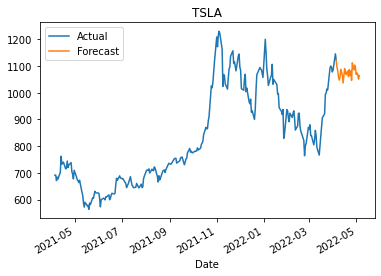

In [66]:
ticker = "TSLA"

# download the data
df = yf.download(tickers=[ticker], period='1y')
y = df[['Close', 'Volume']].fillna(method='ffill')
#print(y)
y = y.values.reshape(-1, 2)
#print(y)
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(y)
print(y.shape)
y = scaler.transform(y)
#print(y)
# generate the input and output sequences
n_lookback = 60  # length of input sequences (lookback period)
n_forecast = 30  # length of output sequences (forecast period)

X = []
Y = []

for i in range(n_lookback, len(y) - n_forecast + 1):
    X.append(y[i - n_lookback: i])
    y_tmp = y[i: i + n_forecast]
    Y.append(y_tmp[0][0])
#print(X)
#print(Y)
X = np.array(X)
Y = np.array(Y)
print(X.shape, Y.shape)

# fit the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_lookback, 2)))
model.add(LSTM(units=50))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=20, batch_size=32, verbose=0)

# generate the forecasts
X_ = y[- n_lookback:]  # last available input sequence
X_ = X_.reshape(1, n_lookback, 2)

Y_ = model.predict(X_).reshape(-1, 1)
#print(Y_)
tmp_zeros = [0] * len(Y_)
tmp = np.array(list(zip(Y_,tmp_zeros)))
tmp_dict = {"pred":Y_.flatten(), "zero":tmp_zeros}
#print(tmp_dict)
tmp_df = pd.DataFrame.from_dict(tmp_dict)
#print(tmp_df)
Y_ = scaler.inverse_transform(tmp_df)
Y_ = [item[0] for item in Y_]
#print(Y_)

# organize the results in a data frame
df_past = df[['Close']].reset_index()
df_past.rename(columns={'index': 'Date', 'Close': 'Actual'}, inplace=True)
df_past['Date'] = pd.to_datetime(df_past['Date'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = pd.date_range(start=df_past['Date'].iloc[-1] + pd.Timedelta(days=1), periods=n_forecast)
df_future['Forecast'] = Y_#.flatten()
df_future['Actual'] = np.nan

results = df_past.append(df_future).set_index('Date')

# plot the results
results.plot(title=ticker)